# PANDAS CREDIT CARD CASE STUDY

## IMPORTING LIBRARIES

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import plotly

## IMPORTING DATASETS

In [2]:
customer_acquisition = pd.read_csv('C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FOUNDATION/4. Pandas Case Study 2 - Credit Card Case Study/4. Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')
repayment = pd.read_csv('C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FOUNDATION/4. Pandas Case Study 2 - Credit Card Case Study/4. Pandas Case Study 2 - Credit Card Case Study/Repayment.csv')
spend = pd.read_csv('C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FOUNDATION/4. Pandas Case Study 2 - Credit Card Case Study/4. Pandas Case Study 2 - Credit Card Case Study/spend.csv')


In [3]:
customer_acquisition.shape

(100, 8)

In [4]:
repayment.shape

(1523, 5)

In [5]:
spend.shape

(1500, 5)

## JOINING THE DATASETS

In [6]:
spend_data = pd.merge(left = customer_acquisition, right = spend, on = 'Customer', how = 'left')

In [7]:
repay_data = pd.merge(left = customer_acquisition, right = repayment, on = 'Customer', how = 'left')

In [8]:
spend_data.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13


In [9]:
repay_data.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN


#### REMOVING UNNECESSARY COLUMNS

In [10]:
spend_data.drop(columns = ['No', 'Sl No:'], inplace = True)

In [11]:
repay_data.drop(columns = ['No', 'SL No:', 'Unnamed: 4'], inplace = True)

In [12]:
spend_data.columns

Index(['Customer', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment',
       'Month', 'Type', 'Amount'],
      dtype='object')

In [13]:
repay_data.columns

Index(['Customer', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment',
       'Month', 'Amount'],
      dtype='object')

In [14]:
# RENAMING COLUMNS FOR BETTER UNDERSTANDING
spend_data.rename(columns = {'Month' : 'spend_date', 'Amount' : 'amt_spend'}, inplace = True) 
repay_data.rename(columns = {'Month' : 'repay_date', 'Amount' : 'amt_repay'}, inplace = True)

In [15]:
spend_data.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,spend_date,Type,amt_spend
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13


In [16]:
repay_data.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,repay_date,amt_repay
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02


In [17]:
spend_data.dtypes, repay_data.dtypes

(Customer       object
 Age             int64
 City           object
 Product        object
 Limit         float64
 Company        object
 Segment        object
 spend_date     object
 Type           object
 amt_spend     float64
 dtype: object,
 Customer       object
 Age             int64
 City           object
 Product        object
 Limit         float64
 Company        object
 Segment        object
 repay_date     object
 amt_repay     float64
 dtype: object)

### CORRECTING DATATYPES

In [18]:
spend_data['spend_date'] = pd.to_datetime(spend_data['spend_date'], format = '%d-%b-%y')
repay_data['repay_date'] = pd.to_datetime(repay_data['repay_date'], format = '%d-%b-%y')

In [19]:
spend_data.dtypes, repay_data.dtypes

(Customer              object
 Age                    int64
 City                  object
 Product               object
 Limit                float64
 Company               object
 Segment               object
 spend_date    datetime64[ns]
 Type                  object
 amt_spend            float64
 dtype: object,
 Customer              object
 Age                    int64
 City                  object
 Product               object
 Limit                float64
 Company               object
 Segment               object
 repay_date    datetime64[ns]
 amt_repay            float64
 dtype: object)

## Q1. In the above dataset,

### (a). In case age is less than 18, replace it with mean of age values.

In [20]:
spend_data.loc[spend_data['Age'] < 18, 'Age'].head(2)

236    16
237    16
Name: Age, dtype: int64

In [21]:
repay_data.loc[repay_data['Age'] < 18, 'Age'].head(2)

236    16
237    16
Name: Age, dtype: int64

In [22]:
spend_data.loc[spend_data['Age'] < 18, 'Age'] = int(np.mean(spend_data['Age']))
repay_data.loc[repay_data['Age'] < 18, 'Age'] = int(np.mean(repay_data['Age']))

In [23]:
spend_data.loc[spend_data['Age'] < 18, 'Age'].head(2)

Series([], Name: Age, dtype: int64)

In [24]:
repay_data.loc[repay_data['Age'] < 18, 'Age'].head(2)

Series([], Name: Age, dtype: int64)

### (b). In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [25]:
spend_data.loc[spend_data['amt_spend'] > spend_data['Limit']].head(2)

,Customer,Age,City,Product,Limit,Company,Segment,spend_date,Type,amt_spend
18,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,199554.72
19,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,TRAIN TICKET,376887.49


In [26]:
spend_data.loc[spend_data['amt_spend'] > spend_data['Limit'], 'amt_spend'] = 0.5*spend_data['Limit']

In [27]:
spend_data.loc[spend_data['amt_spend'] > spend_data['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,spend_date,Type,amt_spend


### (c). Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [28]:
repay_data.loc[repay_data['amt_repay'] > repay_data['Limit']].head(2)

,Customer,Age,City,Product,Limit,Company,Segment,repay_date,amt_repay
18,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,185955.07
19,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,412783.34


In [29]:
repay_data.loc[repay_data['amt_repay'] > repay_data['Limit'], 'amt_repay'] = repay_data['Limit']

In [30]:
repay_data.loc[repay_data['amt_repay'] > repay_data['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,repay_date,amt_repay


## Q2. From the above dataset create the following summaries:
### (a) How many distinct customers exist?

In [31]:
spend_data.Customer.nunique(), repay_data.Customer.nunique()

(100, 100)

### (b) How many distinct categories exist?

In [32]:
spend_data.Segment.nunique(), repay_data.Segment.nunique()

(5, 5)

### (c) What is the average monthly spend by customers?

In [33]:
spend_data.amt_spend.sum()/(((max(spend_data['spend_date']) - min(spend_data['spend_date'])).days)/30)

6191016.485352113

### (d) What is the average monthly repayment by customers?

In [34]:
repay_data.amt_repay.sum()/(((max(repay_data['repay_date']) - min(repay_data['repay_date'])).days)/30)

6900911.551830986

### (e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [35]:
monthly_spend = pd.DataFrame(spend_data.groupby([pd.DatetimeIndex(spend_data['spend_date']).year,
                                                 pd.DatetimeIndex(spend_data['spend_date']).month]).amt_spend.sum())

In [36]:
monthly_spend.index.names = ['Year', 'Month']

In [37]:
monthly_spend.index.names

FrozenList(['Year', 'Month'])

In [38]:
monthly_spend.reset_index(inplace = True)

In [39]:
monthly_repay = pd.DataFrame(repay_data.groupby([pd.DatetimeIndex(repay_data['repay_date']).year,
                                                 pd.DatetimeIndex(repay_data['repay_date']).month]).amt_repay.sum())

In [40]:
monthly_repay.index.names = ['Year', 'Month']

In [41]:
monthly_repay.index.names

FrozenList(['Year', 'Month'])

In [42]:
monthly_repay.reset_index(inplace = True)

In [43]:
monthly_profit = pd.merge(left = monthly_spend, right = monthly_repay, on = ['Year', 'Month'], how = 'inner')

In [44]:
monthly_profit['profit'] = np.where((monthly_profit['amt_repay'] - monthly_profit['amt_spend']) > 0, 
                                    0.29*(monthly_profit['amt_repay'] - monthly_profit['amt_spend']), 0)

In [45]:
monthly_profit

,Year,Month,amt_spend,amt_repay,profit
0,2004,1,44279811.96,44792020.72,1.485405e+05
1,2004,2,3835951.84,3391537.65,0.000000e+00
2,2004,3,1871913.27,2666519.22,2.304357e+05
3,2004,4,3489415.34,5268979.74,5.160737e+05
4,2004,5,2146577.36,3782759.91,4.744929e+05
5,2004,9,2402109.69,1902816.41,0.000000e+00
6,2004,11,1114989.10,1788398.63,1.952888e+05
7,2005,1,5383606.78,4894040.25,0.000000e+00
8,2005,2,25928183.21,25491800.20,0.000000e+00
9,2005,4,4100065.73,3634903.56,0.000000e+00


### (f) What are the top 5 product types?

In [46]:
(spend_data.groupby('Type').amt_spend.sum()).sort_values(ascending = False).head()

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
Name: amt_spend, dtype: float64

### (g) Which city is having maximum spend?

In [47]:
spend_data.groupby('City').amt_spend.sum().sort_values(ascending = False).head(1)

City
COCHIN    45963513.5
Name: amt_spend, dtype: float64

### (h) Which age group is spending more money?

In [48]:
spend_data['age_category'] = np.where(spend_data['Age'] > 60, 'Senior', 
                                     np.where(spend_data['Age'] > 30, 'Adult', 'Youth'))

In [49]:
spend_data.groupby('age_category').amt_spend.sum().sort_values(ascending = False)

age_category
Adult     1.240806e+08
Youth     5.268990e+07
Senior    4.301063e+07
Name: amt_spend, dtype: float64

### (i) Who are the top 10 customers in terms of repayment?

In [50]:
repay_data.groupby('Customer').amt_repay.sum().sort_values(ascending = False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: amt_repay, dtype: float64

## Q3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [51]:
q3_data = pd.DataFrame(spend_data.groupby(['City', 'Type', pd.DatetimeIndex(spend_data['spend_date']).year]).amt_spend.sum())
q3_data

amt_spend
City       Type         spend_date            
BANGALORE  AIR TICKET   2004         749981.04
                        2005        1972296.92
                        2006        1311522.46
           AUTO         2005         141539.79
                        2006         822785.32
...                                        ...
TRIVANDRUM SHOPPING     2005         428833.42
                        2006         100001.00
           TRAIN TICKET 2004         177612.22
                        2005         276962.03
                        2006         262422.86

[321 rows x 1 columns]

In [52]:
q3_data.reset_index(inplace = True)

In [53]:
q3_data

,City,Type,spend_date,amt_spend
0,BANGALORE,AIR TICKET,2004,749981.04
1,BANGALORE,AIR TICKET,2005,1972296.92
2,BANGALORE,AIR TICKET,2006,1311522.46
3,BANGALORE,AUTO,2005,141539.79
4,BANGALORE,AUTO,2006,822785.32
...,...,...,...,...
316,TRIVANDRUM,SHOPPING,2005,428833.42
317,TRIVANDRUM,SHOPPING,2006,100001.00
318,TRIVANDRUM,TRAIN TICKET,2004,177612.22
319,TRIVANDRUM,TRAIN TICKET,2005,276962.03


In [129]:
from plotnine import ggplot, aes, geom_bar, geom_line, facet_grid

In [55]:
q3_plot = (ggplot(data = q3_data) +
          aes(x = 'City', y = 'amt_spend', fill = 'Type') + 
          geom_bar(stat = 'identity') + 
          facet_grid('spend_date~'))

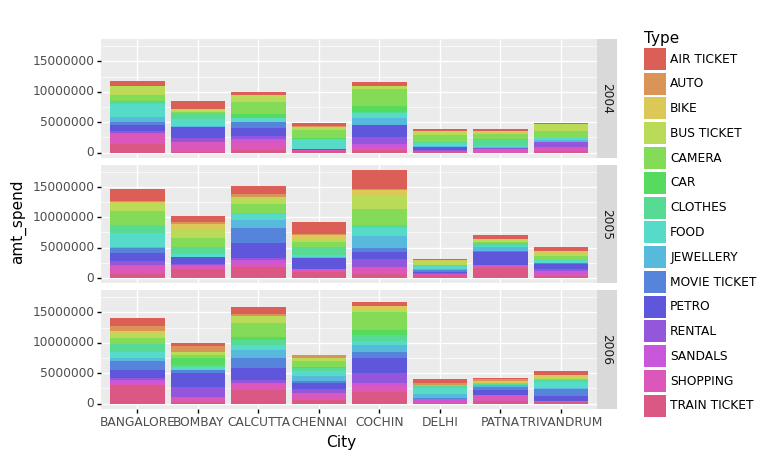

<ggplot: (145014410192)>

In [56]:
q3_plot

## Q4. Create graphs for
### (a) Monthly comparison of total spends, city wise

In [106]:
q4_a_data = pd.DataFrame(spend_data.groupby(['City', pd.DatetimeIndex(spend_data['spend_date']).month]).amt_spend.sum())
q4_a_data.reset_index(inplace = True)
q4_a_data.spend_date = q4_a_data.spend_date.astype('object')
q4_a_data

,City,spend_date,amt_spend
0,BANGALORE,1,9041796.84
1,BANGALORE,2,6734494.76
2,BANGALORE,3,5362903.07
3,BANGALORE,4,4207980.48
4,BANGALORE,5,6383115.13
...,...,...,...
91,TRIVANDRUM,8,453773.94
92,TRIVANDRUM,9,186063.70
93,TRIVANDRUM,10,285581.92
94,TRIVANDRUM,11,143387.40


In [116]:
q4_a_plot = (ggplot(data = q4_a_data) + 
             aes(x = 'spend_date', y = 'amt_spend', fill = 'City') + 
            geom_bar(stat = 'identity') + 
            facet_grid('City~'))

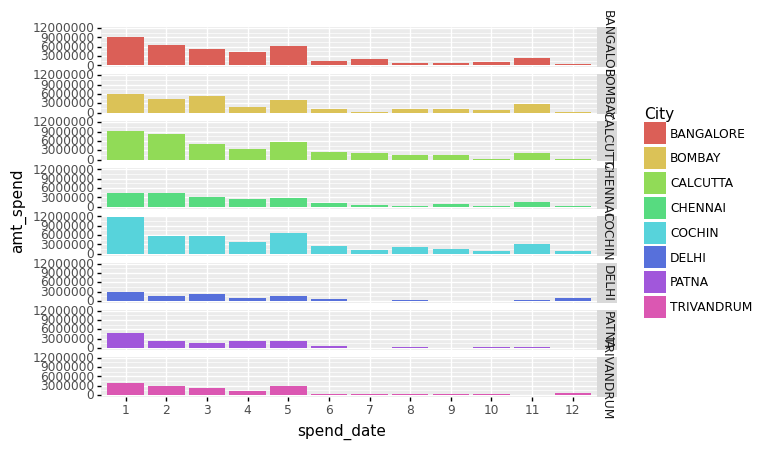

<ggplot: (145018451191)>

In [117]:
q4_a_plot

### Q4. (b) Comparison of yearly spend on air tickets

In [120]:
spend_data[spend_data['Type'] == 'AIR TICKET']

,Customer,Age,City,Product,Limit,Company,Segment,spend_date,Type,amt_spend,age_category
9,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,Senior
63,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary,2006-03-03,AIR TICKET,5001.00,Adult
80,A6,70,DELHI,Silver,100000.0,C6,Self Employed,2006-04-03,AIR TICKET,50000.00,Senior
97,A7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC,2006-05-03,AIR TICKET,50000.50,Youth
115,A8,67,PATNA,Silver,100002.0,C8,Salaried_Pvt,2006-06-03,AIR TICKET,50001.00,Senior
...,...,...,...,...,...,...,...,...,...,...,...
1474,A75,36,BOMBAY,Silver,100003.0,C37,Self Employed,2005-02-23,AIR TICKET,50001.50,Adult
1475,A76,66,BANGALORE,Silver,500000.0,C38,Self Employed,2005-02-03,AIR TICKET,30066.44,Senior
1476,A77,35,BANGALORE,Silver,500000.0,C39,Self Employed,2006-02-04,AIR TICKET,31048.93,Adult
1483,A84,70,PATNA,Silver,100000.0,C7,Govt,2006-03-27,AIR TICKET,50000.00,Senior


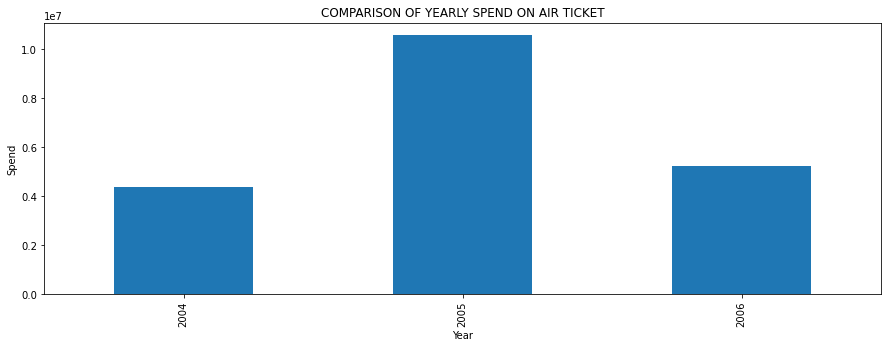

In [124]:
(spend_data[spend_data['Type'] == 'AIR TICKET'].groupby(pd.DatetimeIndex(spend_data.loc[spend_data['Type'] == 'AIR TICKET', 'spend_date']).year).amt_spend.sum()).plot(kind = 'bar', figsize = (15, 5))
plt.title('COMPARISON OF YEARLY SPEND ON AIR TICKET')
plt.xlabel('Year')
plt.ylabel('Spend')
plt.show()

### Q4. (c) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [127]:
q4_c_data = pd.DataFrame(spend_data.groupby([pd.DatetimeIndex(spend_data['spend_date']).month, 'Product']).amt_spend.sum())
q4_c_data.reset_index(inplace = True)
q4_c_data.spend_date = q4_c_data.spend_date.astype('object') 
q4_c_data

,spend_date,Product,amt_spend
0,1,Gold,32413831.83
1,1,Platimum,14951578.51
2,1,Silver,4206383.62
3,2,Gold,24779179.55
4,2,Platimum,9134054.58
5,2,Silver,2087018.37
6,3,Gold,19256972.48
7,3,Platimum,7288837.68
8,3,Silver,3909405.83
9,4,Gold,13170572.59


In [144]:
q4_c_plot = (ggplot(q4_c_data) + 
             aes(x = 'spend_date', y = 'amt_spend') +
             geom_bar(stat = 'identity') + 
             facet_grid('Product~'))

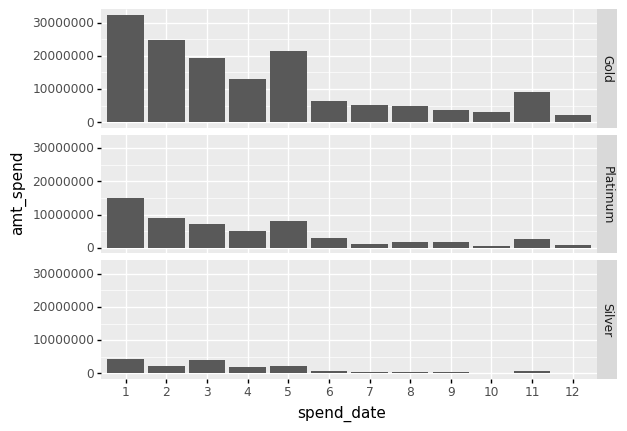

<ggplot: (145019599011)>

In [145]:
q4_c_plot

## Q5. Write user defined PYTHON function to perform the following analysis:

You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [163]:
def top_customers(product, period) :
    
    data = repay_data[repay_data['Product'] == product]
    
    if period == 'year' :
        data = pd.DataFrame(data.groupby(['Customer', 'City', pd.DatetimeIndex(data['repay_date']).year]).amt_repay.sum())
        data.reset_index(inplace = True)
        
    elif period == 'month' :
        data = pd.DataFrame(data.groupby(['Customer', 'City', pd.DatetimeIndex(data['repay_date']).month]).amt_repay.sum())
        data.reset_index(inplace = True)
        
    data_bangalore  = data[data['City'] == 'BANGALORE'].sort_values(by = 'amt_repay', ascending = False).head(10)
    data_bombay     = data[data['City'] == 'BOMBAY'].sort_values(by = 'amt_repay', ascending = False).head(10)
    data_calcutta   = data[data['City'] == 'CALCUTTA'].sort_values(by = 'amt_repay', ascending = False).head(10)
    data_chennai    = data[data['City'] == 'CHENNAI'].sort_values(by = 'amt_repay', ascending = False).head(10)
    data_cochin     = data[data['City'] == 'COCHIN'].sort_values(by = 'amt_repay', ascending = False).head(10)
    data_delhi      = data[data['City'] == 'DELHI'].sort_values(by = 'amt_repay', ascending = False).head(10)
    data_patna      = data[data['City'] == 'PATNA'].sort_values(by = 'amt_repay', ascending = False).head(10)
    data_trivandrum = data[data['City'] == 'TRIVANDRUM'].sort_values(by = 'amt_repay', ascending = False).head(10)
    
    data = pd.concat([data_bangalore, data_bombay, data_calcutta, data_chennai, data_cochin, 
                      data_delhi, data_patna, data_trivandrum], axis = 0)
    
    data.sort_values(by = ['City', 'repay_date', 'amt_repay'], ascending = [True, True, False],inplace = True)
        
    return data
    

#### SPECIFY PRODUCT AS 'Gold', 'Silver', 'Platinum' AND PERIOD AS 'year' OR 'month'

In [170]:
top_customers('Gold', 'year')

,Customer,City,repay_date,amt_repay
15,A14,BANGALORE,2004,2770261.30
0,A1,BANGALORE,2004,2359797.84
52,A43,BANGALORE,2005,4006956.60
13,A13,BANGALORE,2005,3757673.00
40,A30,BANGALORE,2005,2667746.38
16,A14,BANGALORE,2005,2491981.61
14,A13,BANGALORE,2006,3477314.89
17,A14,BANGALORE,2006,2681025.72
53,A43,BANGALORE,2006,2576417.39
41,A30,BANGALORE,2006,2486958.41
